In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* random 함수를 사용하는 이유

1. 일반화 좋음.
2. 경험하지 못한 것을 맡아 일을 할 때 좋음.

## 선그래프 : plot()

In [5]:
# 데이터 생성
x = np.linspace(0, 10, 100) # 0 ~ 10 사이
y = 4 + np.sin(x) * 2

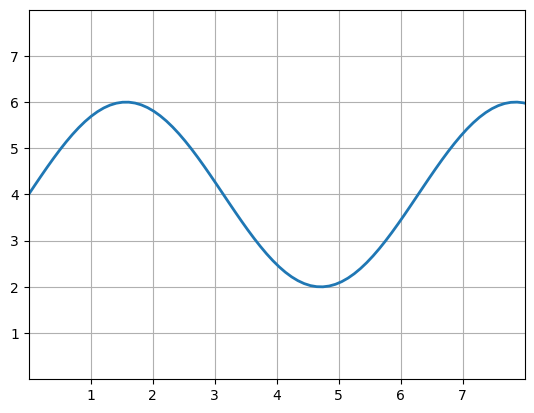

In [6]:
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0) # linewidth : 선두께
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.grid()
plt.show()

In [7]:
path = '../datasets/ML_data/'

In [9]:
raw = pd.read_csv(path+'Advertising.csv', index_col=0)
ad = raw.copy()
ad.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [10]:
ad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

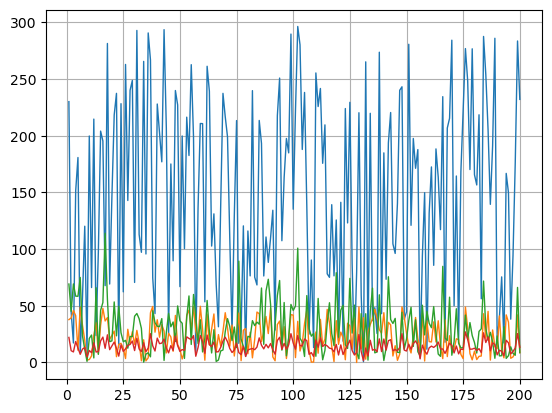

In [11]:
# 데이터 생성
tv = ad['TV']
radio = ad['Radio']
news = ad['Newspaper']
sales = ad['Sales']

# plot 그리기
fig, ax = plt.subplots()

ax.plot(tv, linewidth=1.0)
ax.plot(radio, linewidth=1.0)
ax.plot(news, linewidth=1.0)
ax.plot(sales, linewidth=1.0)

plt.grid()
plt.show()

## 산점도 : scatter()

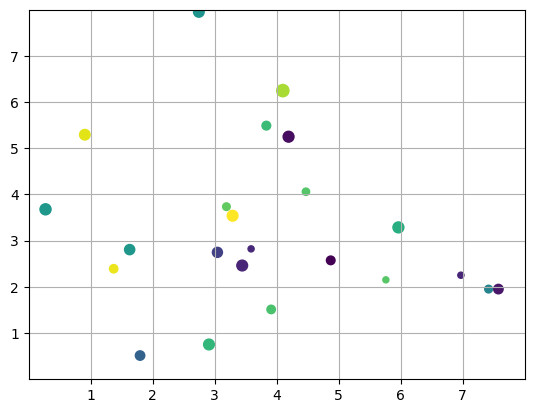

In [12]:
# 데이터 생성
np.random.seed(3)

x = 4 + np.random.normal(0, 2, 24) # 정규분포 (평균, 표준편차, 생성할 개수)
y = 4 + np.random.normal(0, 2, len(x))

# size / color
sizes = np.random.uniform(15, 80, len(x)) # uniform : 동일한 확률로 15 ~ 80개 만들기 (x의 크기 만큼)
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors)
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.grid()
plt.show()

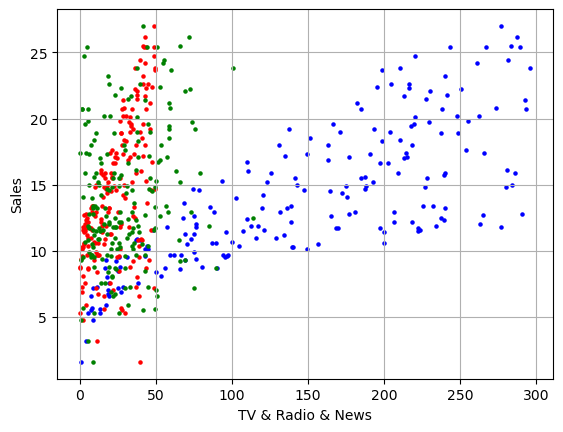

In [20]:
# TV
fig, ax = plt.subplots()

ax.scatter(tv, sales, s=5, c='blue')
ax.scatter(radio, sales, s=5, c='red')
ax.scatter(news, sales, s=5, c='green')
ax.set(xlabel='TV & Radio & News', ylabel='Sales')

plt.grid()
plt.show()

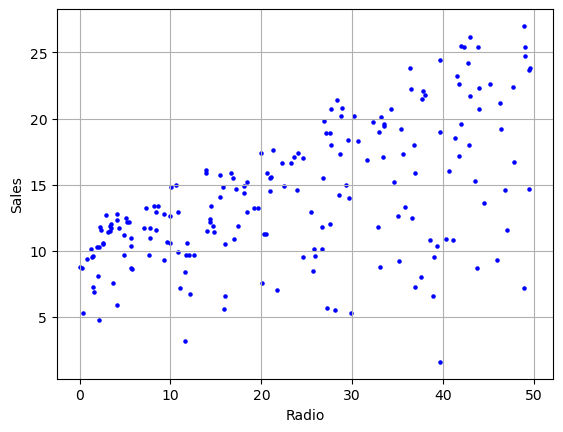

In [15]:
# Radio
fig, ax = plt.subplots()

ax.scatter(radio, sales, s=5, c='blue')
ax.set(xlabel='Radio', ylabel='Sales')

plt.grid()
plt.show()

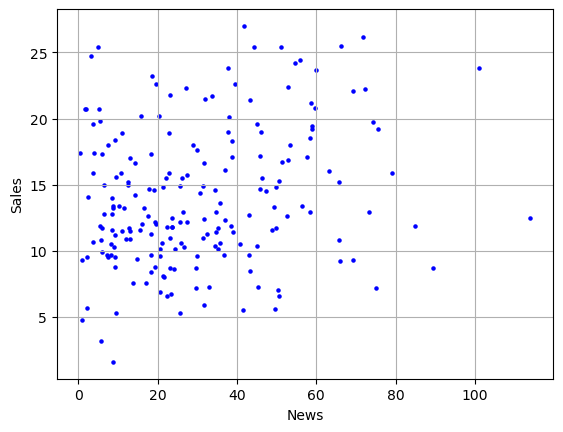

In [16]:
# News
fig, ax = plt.subplots()

ax.scatter(news, sales, s=5, c='blue')
ax.set(xlabel='News', ylabel='Sales')

plt.grid()
plt.show()

## 히스토그램

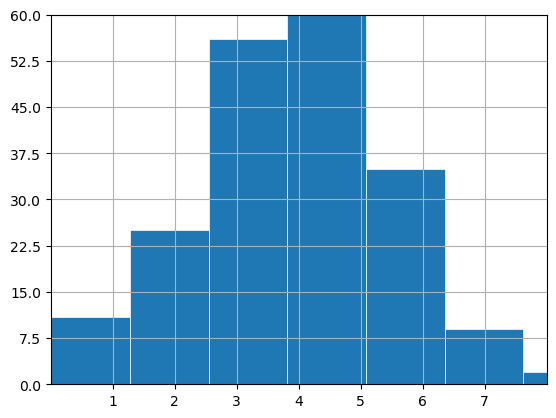

In [27]:
# 데이터 생성
np.random.seed(2)

x = 4 + np.random.normal(0, 1.5, 200)

# plot
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor='white') # bins : 구간 나눔
ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 60), yticks=np.linspace(0, 60, 9))

plt.grid()
plt.show()

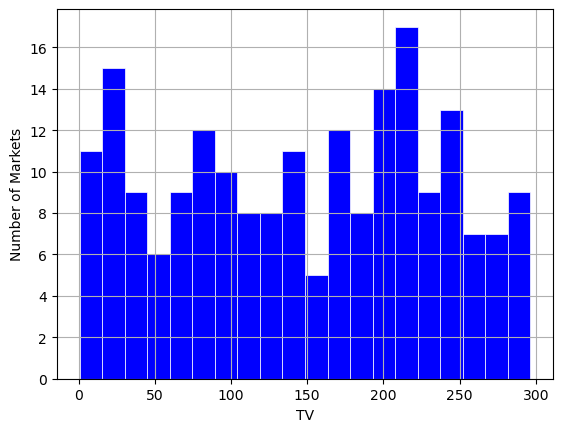

In [34]:
# TV 광고 예산 분포
fig, ax = plt.subplots()

ax.hist(tv, bins=20, linewidth=0.5, edgecolor='white', color='blue')
# ax.hist(radio, bins=20, linewidth=0.5, edgecolor='white', color='red')
ax.set(xlabel='TV', ylabel='Number of Markets')

plt.grid()
plt.show()

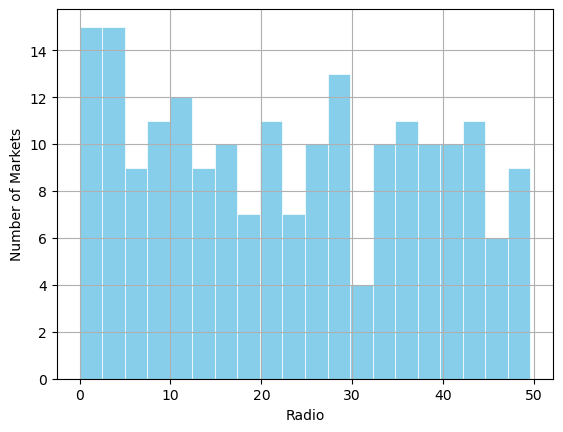

In [37]:
# Radio 광고 예산 분포
fig, ax = plt.subplots()

ax.hist(radio, bins=20, linewidth=0.5, edgecolor='white', color='skyblue')

ax.set(xlabel='Radio', ylabel='Number of Markets')

plt.grid()
plt.show()

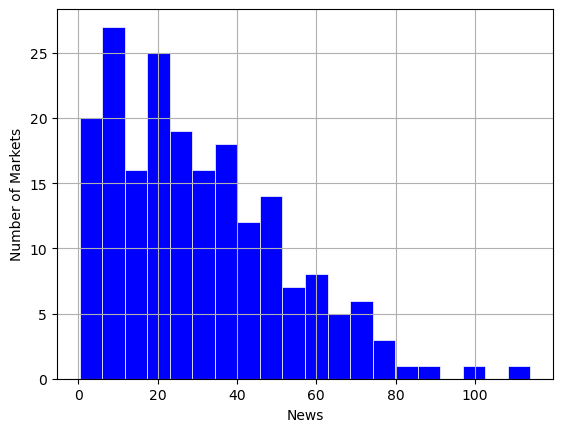

In [36]:
# News 광고 예산 분포
fig, ax = plt.subplots()

ax.hist(news, bins=20, linewidth=0.5, edgecolor='white', color='blue')

ax.set(xlabel='News', ylabel='Number of Markets')

plt.grid()
plt.show()

## boxplot()

In [38]:
# 데이터 생성
np.random.seed(10)

d = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3)) # (평균), (표준편차), (개수, 개수)

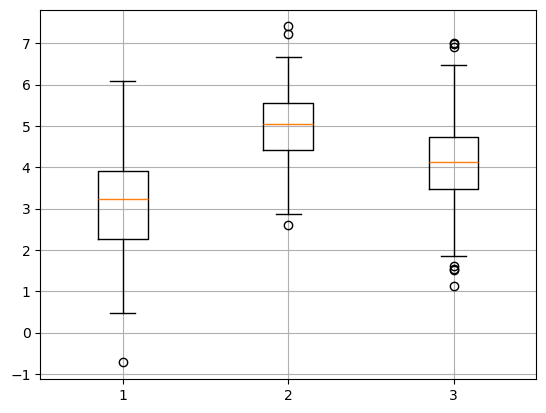

In [40]:
# plot
fig, ax = plt.subplots()

ax.boxplot(d)

plt.grid()
plt.show()

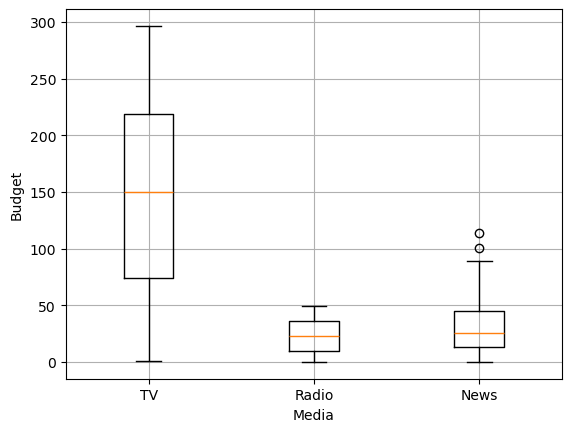

In [47]:
# 3가지 광고 매체 비교
d = [tv, radio, news]

# plot
fig, ax = plt.subplots()

ax.boxplot(d)
ax.set(xlabel='Media',
       ylabel='Budget')

plt.xticks([1, 2, 3], ['TV', 'Radio', 'News'])

plt.grid()
plt.show()

In [48]:
import seaborn as sns

## relplot

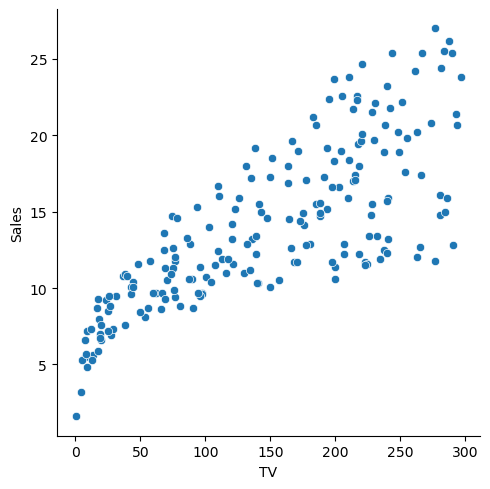

In [49]:
sns.relplot(x=tv, y=sales)
plt.show()

## PairGrid

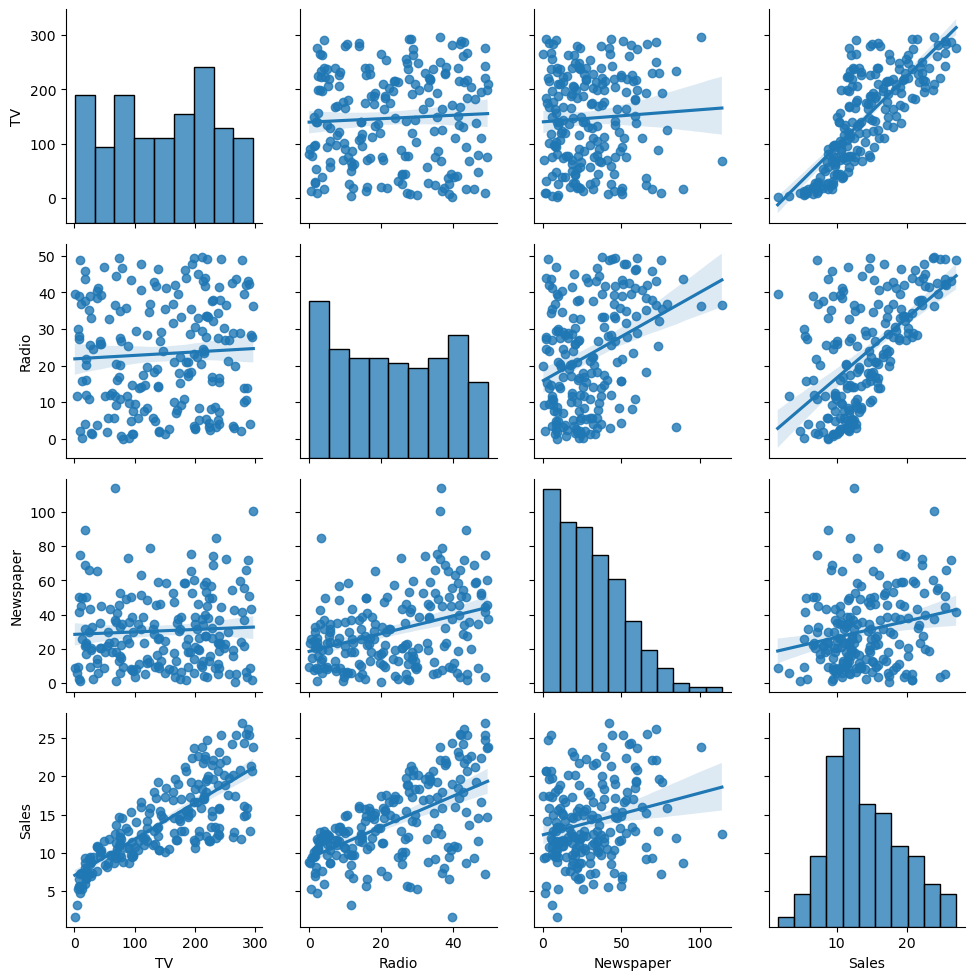

In [53]:
# 여러개의 변수 관계를 볼 수 있는 배경을 만들어 줌.
g = sns.PairGrid(ad)

# 대각선에는 histplot 나오게 한다.
g.map_diag(sns.histplot)

# 대각선이 아닌 것 >> 산점도 & 회귀선으로 표현
g.map_offdiag(sns.regplot)

plt.show()

## regression line

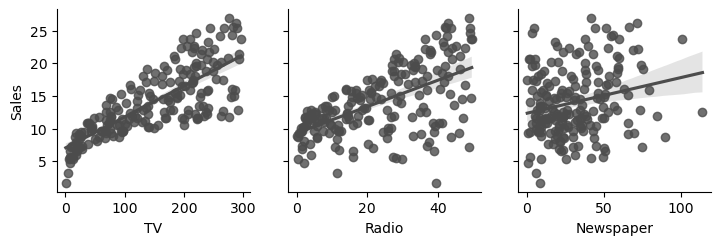

In [52]:
g = sns.PairGrid(ad, y_vars=['Sales'], x_vars=['TV', 'Radio', 'Newspaper'])

g.map(sns.regplot, color='0.3')

plt.show()